<a href="https://colab.research.google.com/github/akarshit2001/Sentiment-analysis-of-restaurant-reviews/blob/main/bigdataproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/bigdata/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #print(review)
    corpus.append(review)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

X = cv.fit_transform(corpus).toarray()

print(X.shape)
y = dataset.iloc[:, 1].values # convert 2d to one dimensional 

(1000, 1500)


In [7]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
import sklearn


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


Confusion Matrix:
 [[114  38]
 [ 32 116]]


Accuracy is  76.67 %
Precision is  0.75
Recall is  0.78


In [12]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4= f1_score(y_test, y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
print("F score is ", round(score4,2))

Confusion Matrix:
 [[124  28]
 [ 44 104]]


Accuracy is  76.0 %
Precision is  0.79
Recall is  0.7
F score is  0.74


In [13]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4= f1_score(y_test, y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
print("F score is ", round(score4,2))


Confusion Matrix:
 [[119  33]
 [ 34 114]]


Accuracy is  77.67 %
Precision is  0.78
Recall is  0.77
F score is  0.77


In [14]:
#SVM

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4= f1_score(y_test, y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
print("F score is ", round(score4,2))

Confusion Matrix:
 [[125  27]
 [ 44 104]]


Accuracy is  76.33 %
Precision is  0.79
Recall is  0.7
F score is  0.75


In [16]:
from sklearn.tree import DecisionTreeClassifier
reg= DecisionTreeClassifier(criterion="gini")
reg.fit(X_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = reg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4= f1_score(y_test, y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
print("F score is ", round(score4,2))

Confusion Matrix:
 [[117  35]
 [ 50  98]]


Accuracy is  71.67 %
Precision is  0.74
Recall is  0.66
F score is  0.7


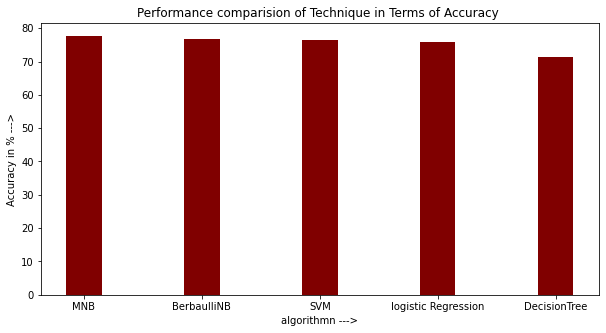

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'MNB':77.67, 'BerbaulliNB':76.67, 
        'SVM':76.33,'logistic Regression':76,'DecisionTree':71.33}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.3)
 
plt.xlabel("algorithmn --->")
plt.ylabel("Accuracy in % --->")
plt.title("Performance comparision of Technique in Terms of Accuracy ")
plt.show()

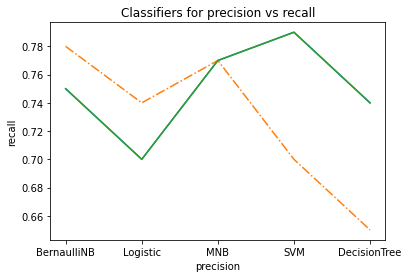

In [19]:

import matplotlib.pyplot as plt
import numpy as np
x= ['BernaulliNB','Logistic','MNB','SVM','DecisionTree'] 
y = [0.75,0.7,0.77,0.79,0.74]

plt.plot(x,y)
x1= ['BernaulliNB','Logistic','MNB','SVM','DecisionTree'] 
y1 = [0.78,0.74,0.77,0.7,0.65]
  
# first plot with X and Y data
plt.plot(x1, y1, '-.')
  
  
# second plot with x1 and y1 data
plt.plot(x, y)
  
plt.xlabel("precision")
plt.ylabel("recall")
plt.title('Classifiers for precision vs recall')
plt.show()

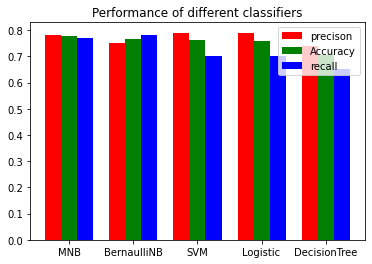

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)
width = 0.25
#precision
xvals = [0.78,0.75,0.79,0.79,0.74]
bar1 = plt.bar(ind, xvals, width, color = 'r')
#accuracy
yvals = [0.7767,.7667,.7633,0.76,0.7033]
bar2 = plt.bar(ind+width, yvals, width, color='g')
#recall
zvals = [0.77,0.78,0.7,0.7,0.65]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.title("Performance of different classifiers")

plt.xticks(ind+width,['MNB','BernaulliNB','SVM','Logistic','DecisionTree'])
plt.legend( (bar1, bar2, bar3), ('precison', 'Accuracy', 'recall') )
plt.show()
